In [1]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def segment_barcode(image):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Apply Gaussian blur to remove noise
#     blurred = cv2.GaussianBlur(gray, (9, 9), 0)

#     # Apply Canny edge detection
#     edges = cv2.Canny(blurred, 50, 150)

#     # Find contours
#     contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Sort contours by area
#     contours = sorted(contours, key=cv2.contourArea, reverse=True)

#     # Iterate over contours
#     for contour in contours:
#         # Approximate the contour
#         peri = cv2.arcLength(contour, True)
#         approx = cv2.approxPolyDP(contour, 0.02 * peri, True)

#         # If the contour has four corners, it could be a barcode
#         if len(approx) == 4:
#             # Draw a rectangle around the contour
#             cv2.drawContours(image, [approx], -1, (0, 255, 0), 3)
#               # Break the loop after finding the first barcode

#     # Display the segmented barcode
#     plt.imshow(image, cmap="gray")
    
# segment_barcode(cropped)


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

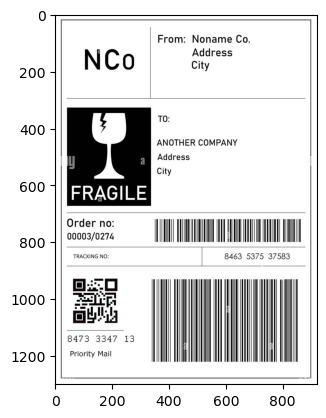

In [3]:
# def remove_boundary(image):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     largest_contour = max(contours, key=cv2.contourArea)

#     x, y, w, h = cv2.boundingRect(largest_contour)

#     cropped_image = image[y:y+h, x:x+w]

#     plt.imshow(cropped_image, cmap='gray')
#     return cropped_image
    
# image = cv2.imread("Bill.jpg")
# crop = remove_boundary(image)

In [5]:
# cropped = crop[25:1275, 20:895]

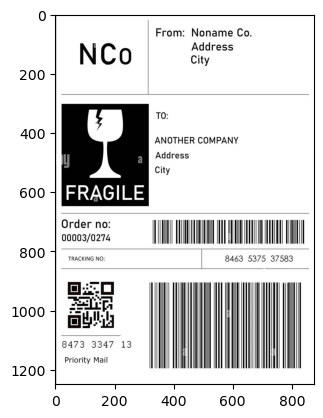

In [6]:
# plt.imshow(cropped, cmap='gray')

/tmp/ipykernel_10100/3629682020.py:34: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(cv2.boxPoints(rect))


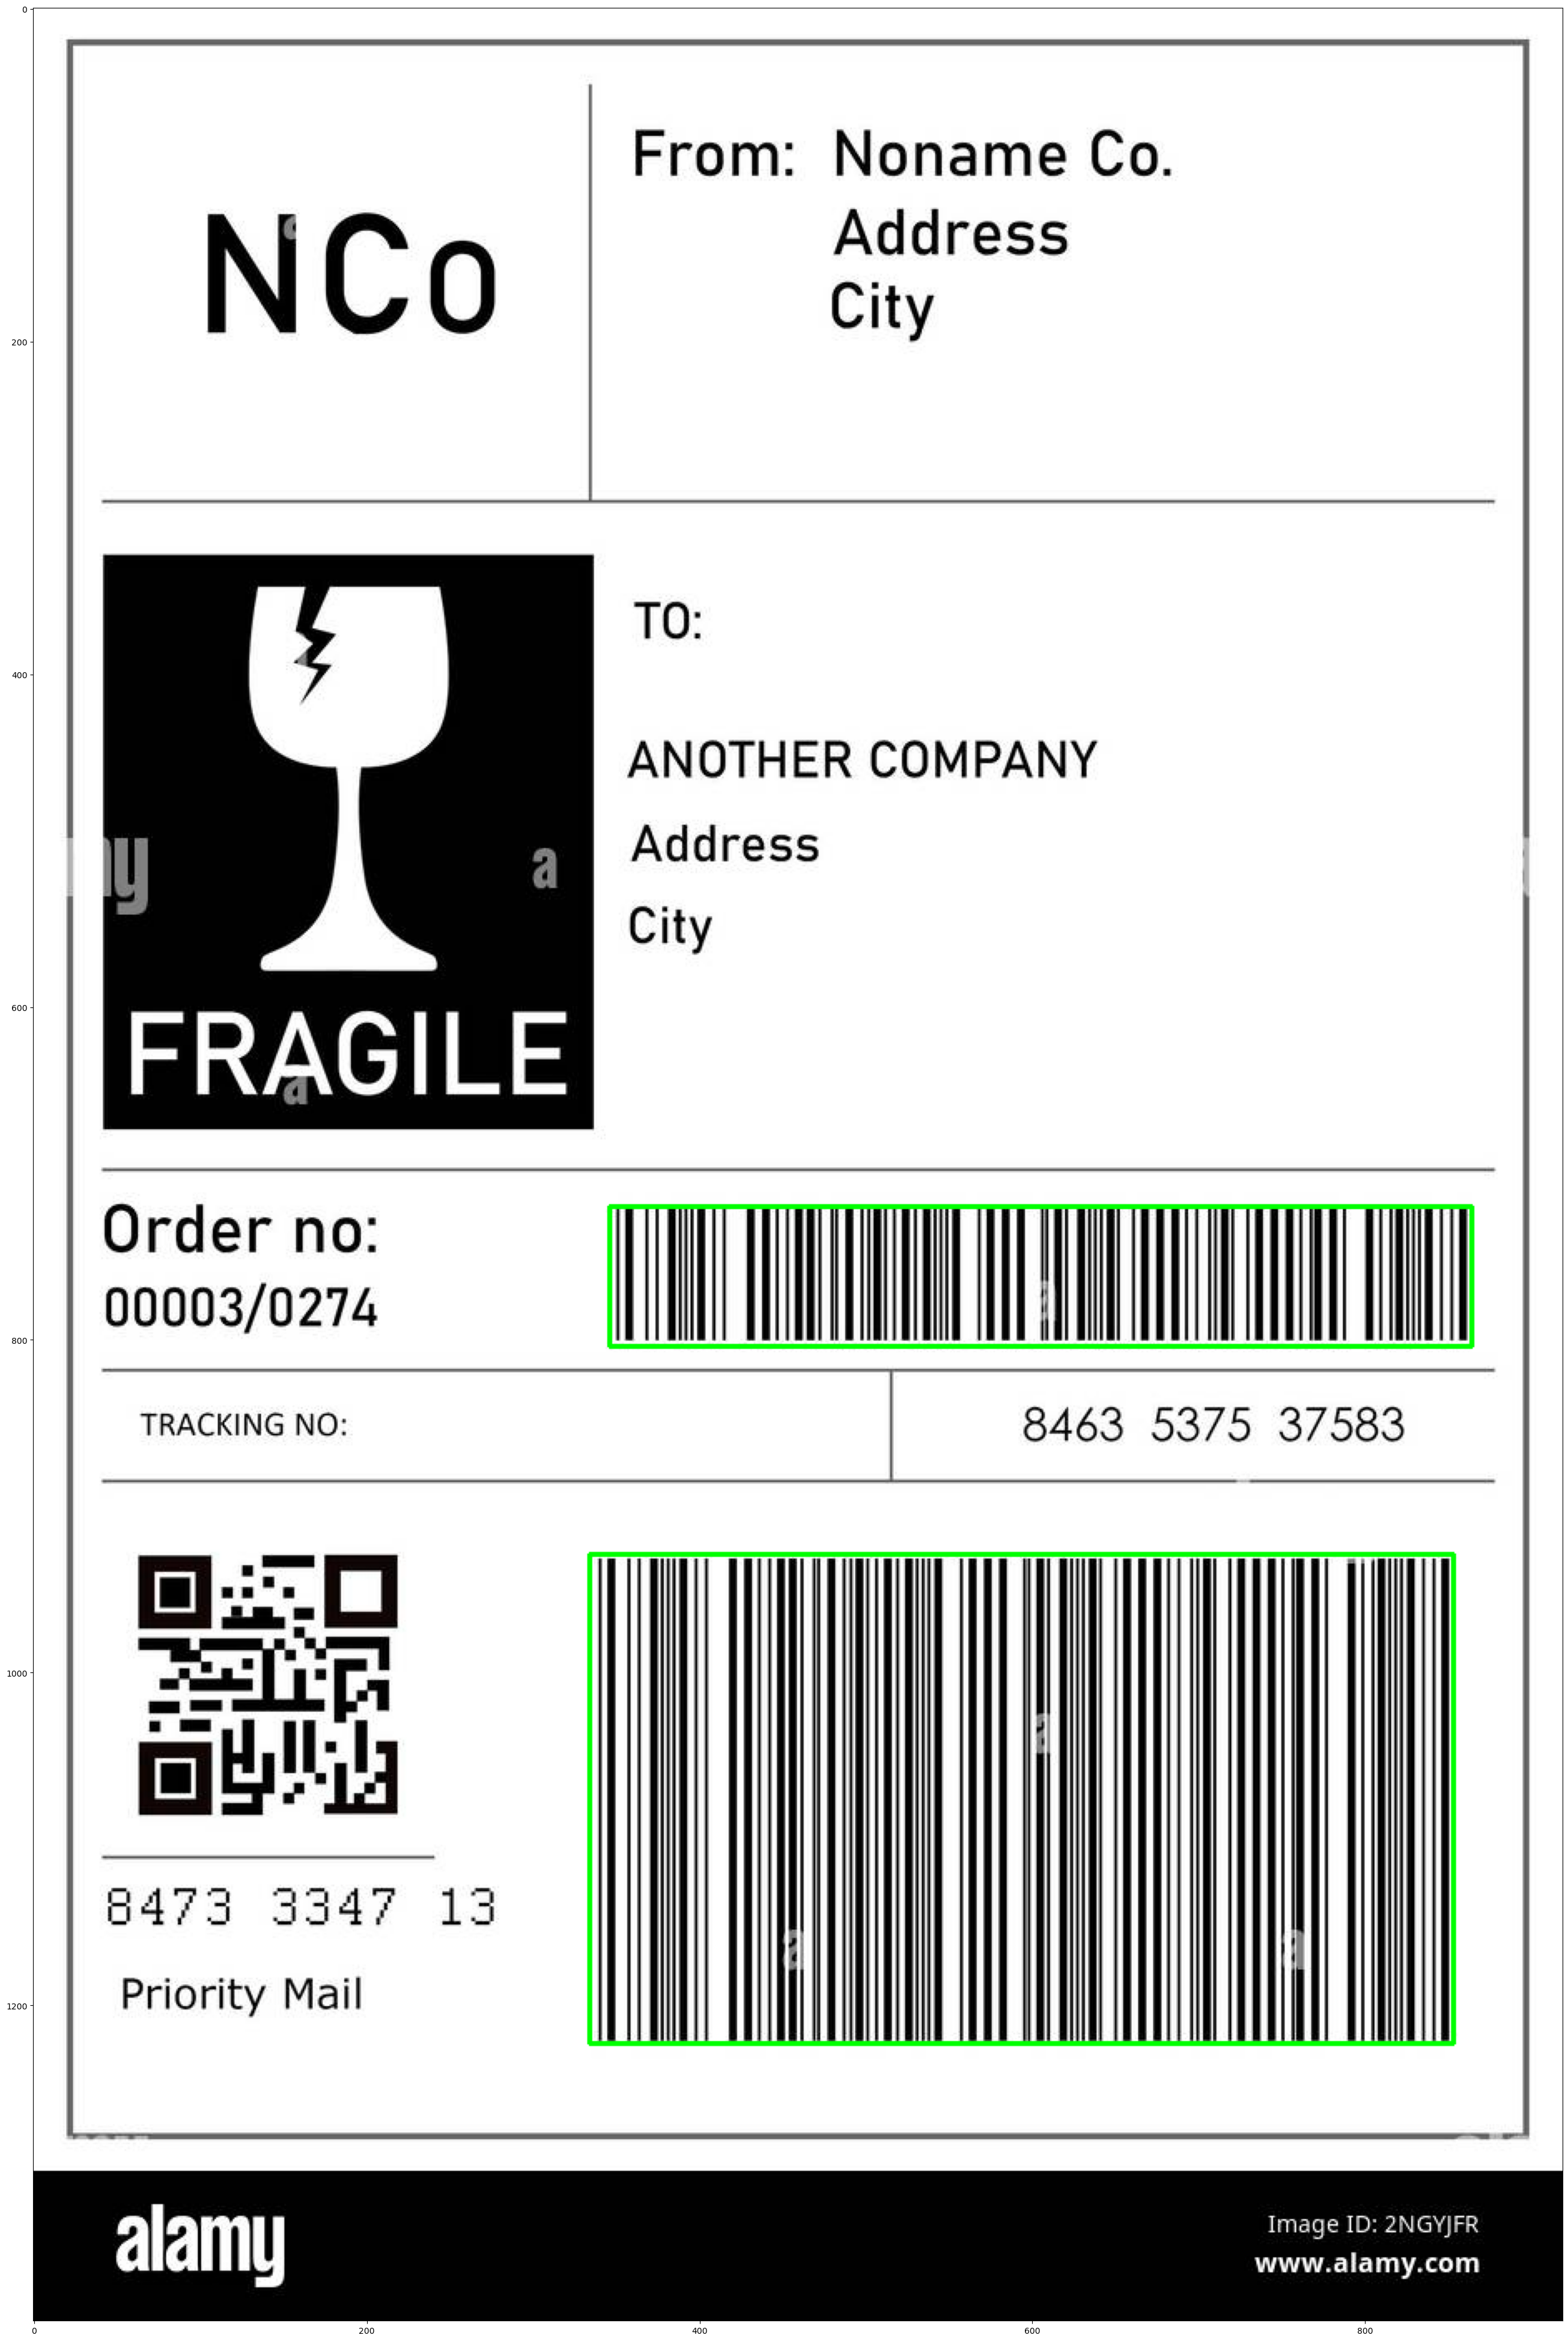

In [43]:
im = cv2.imread('Bill.jpg', cv2.IMREAD_GRAYSCALE)
im_out = cv2.imread('Bill.jpg')

kernel = np.ones((1, 5), np.uint8)
im_1 = cv2.morphologyEx(im, cv2.MORPH_BLACKHAT, kernel, anchor=(1, 0))

thresh, im_2 = cv2.threshold(im_1, 10, 255, cv2.THRESH_BINARY)

kernel = np.ones((1, 5), np.uint8)
im_3 = cv2.morphologyEx(im_2, cv2.MORPH_DILATE, kernel, anchor=(2, 0), iterations=2)
im_4 = cv2.morphologyEx(im_3, cv2.MORPH_CLOSE, kernel, anchor=(2, 0), iterations=2)

kernel = np.ones((21, 35), np.uint8)
im_5 = cv2.morphologyEx(im_4, cv2.MORPH_OPEN, kernel, iterations=1)

contours, hierarchy = cv2.findContours(im_5, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

if contours != None:
    for contour in contours:
         
        if cv2.contourArea(contour) <= 5000:
            continue
        
        rect = cv2.minAreaRect(contour)
        rect = \
            ((int(rect[0][0]), int(rect[0][1])), \
             (int(rect[1][0]), int(rect[1][1])), \
             rect[2])
        
        box = np.int0(cv2.boxPoints(rect))
        cv2.drawContours(im_out, [box], 0, (0, 255, 0), thickness = 2)
        
plt.imshow(im_out)

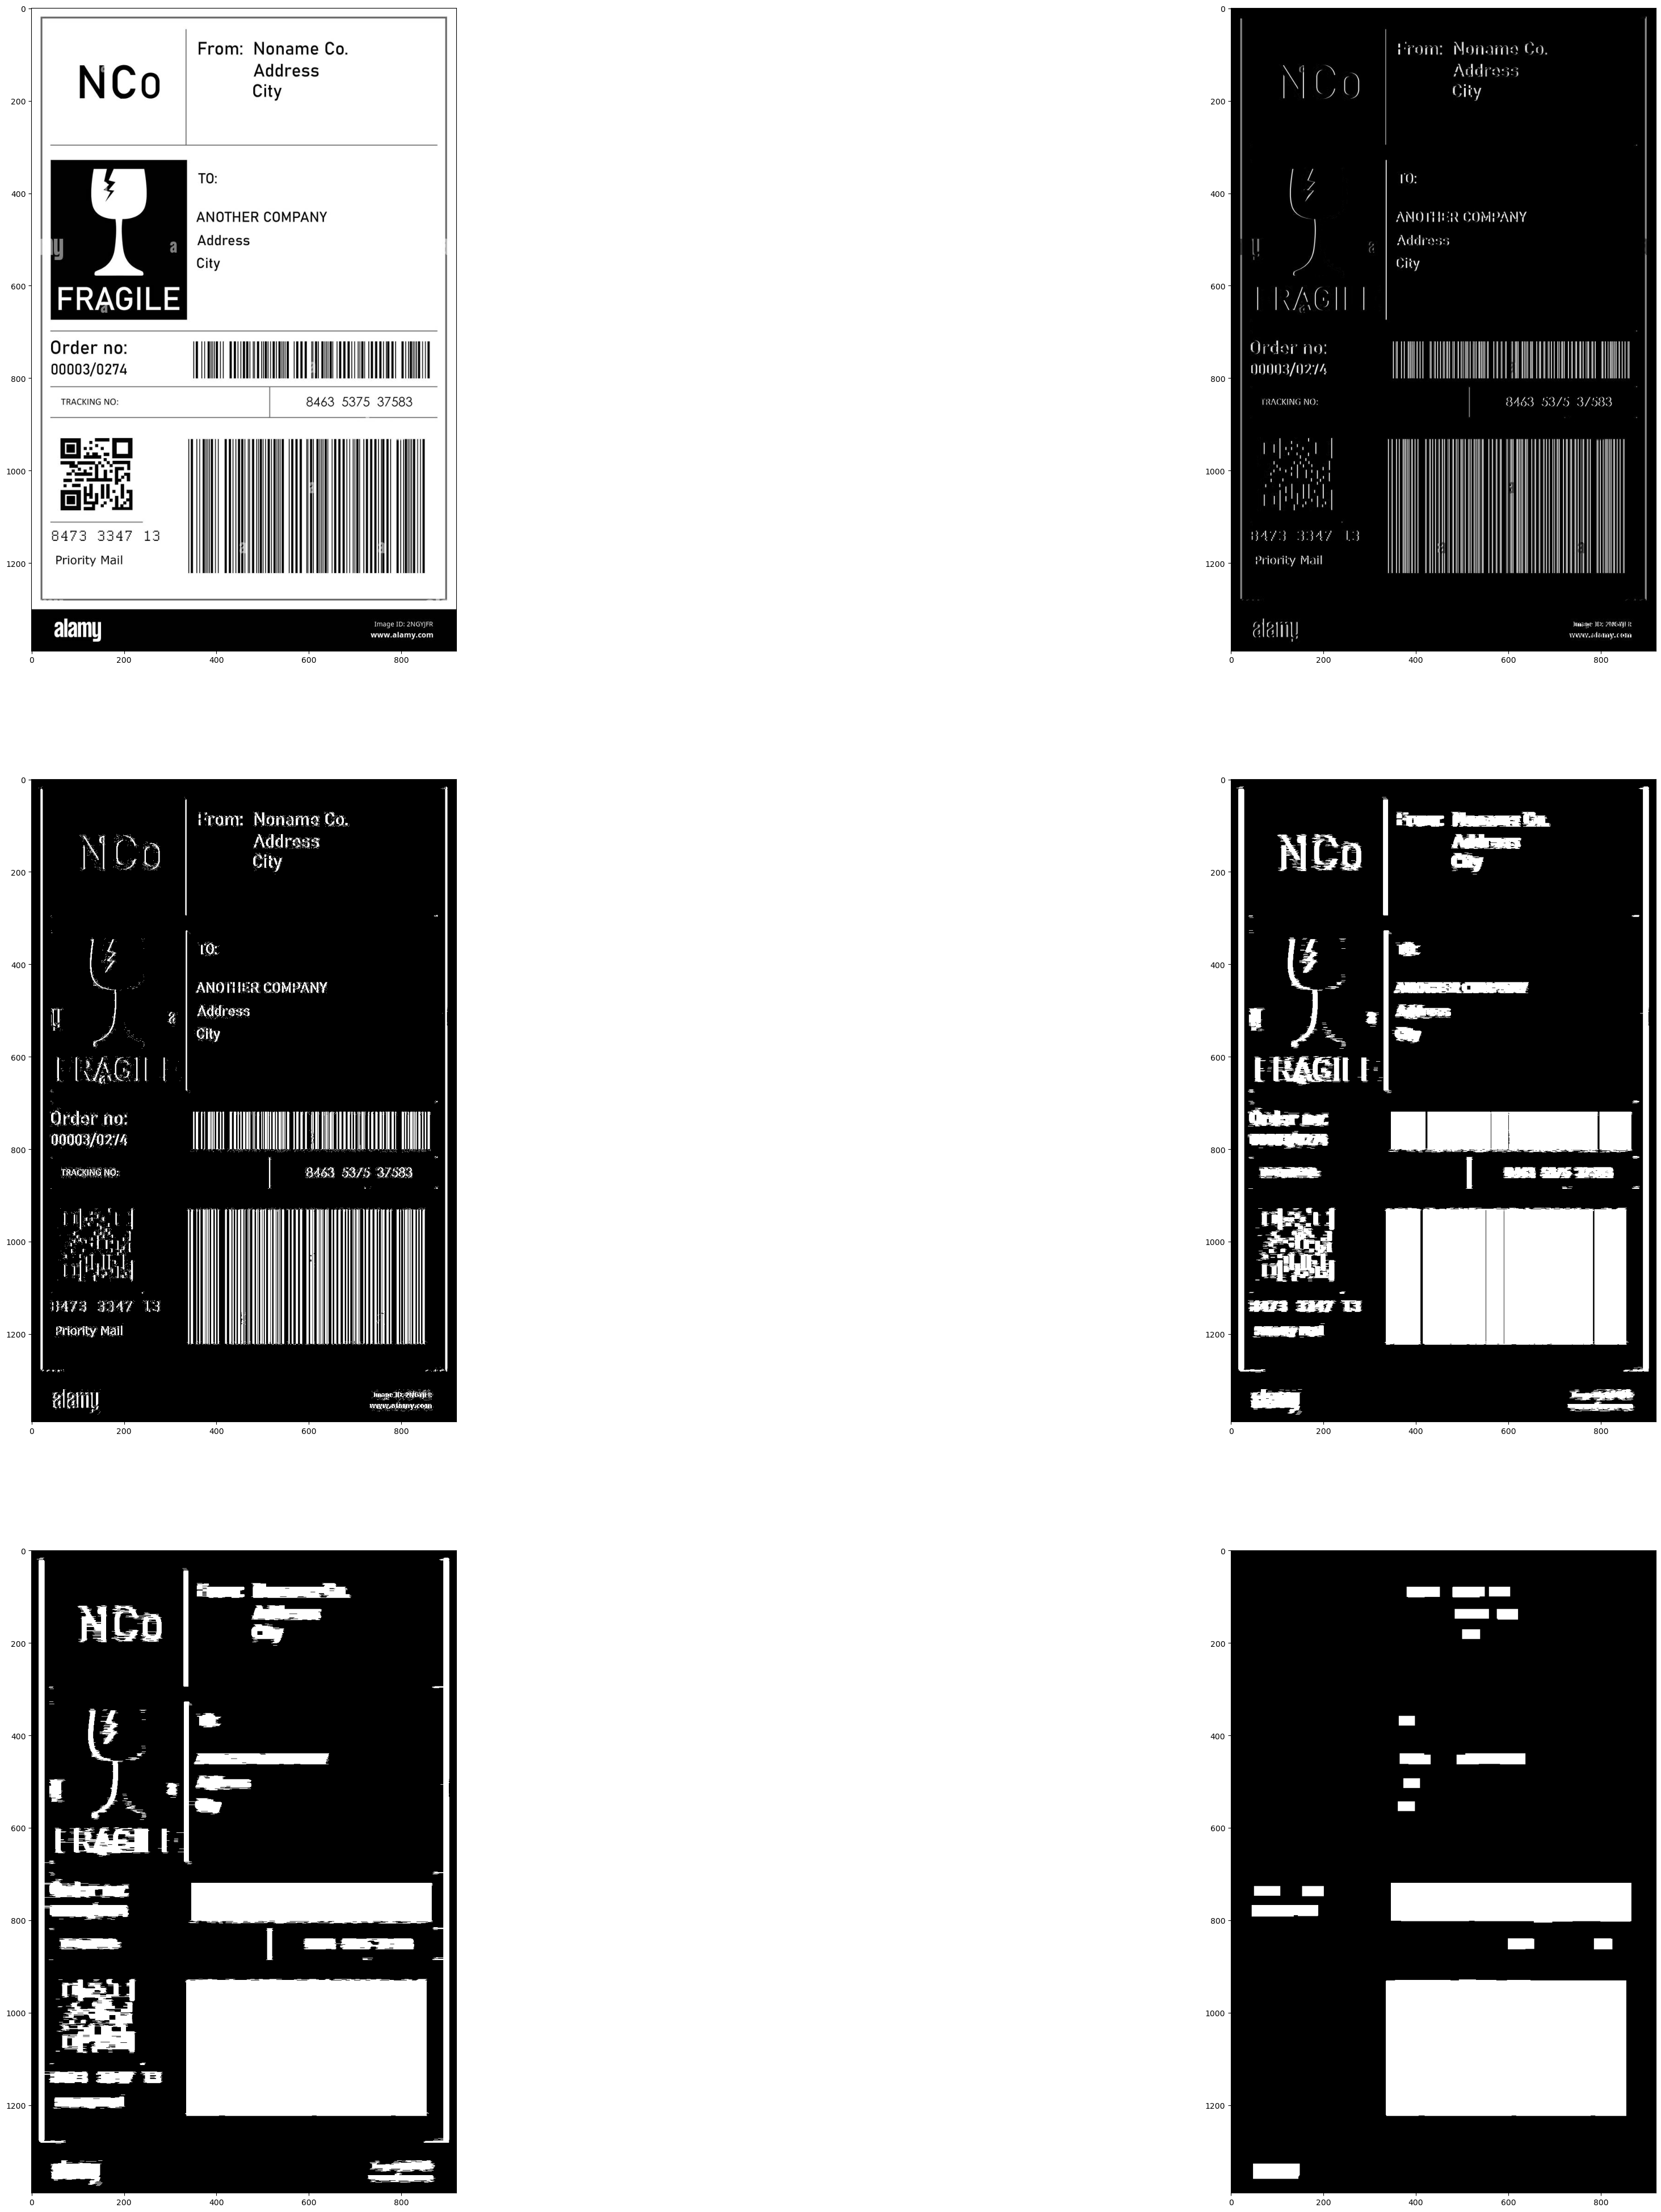

In [39]:
plt.rcParams['figure.figsize'] = (50, 50)

plt.subplot(3, 2, 1)
plt.imshow(im, cmap='gray')

plt.subplot(3, 2, 2)
plt.imshow(im_1, cmap='gray')

plt.subplot(3, 2, 3)
plt.imshow(im_2, cmap='gray')

plt.subplot(3, 2, 4)
plt.imshow(im_3, cmap='gray')

plt.subplot(3, 2, 5)
plt.imshow(im_4, cmap='gray')

plt.subplot(3, 2, 6)
plt.imshow(im_5, cmap='gray')


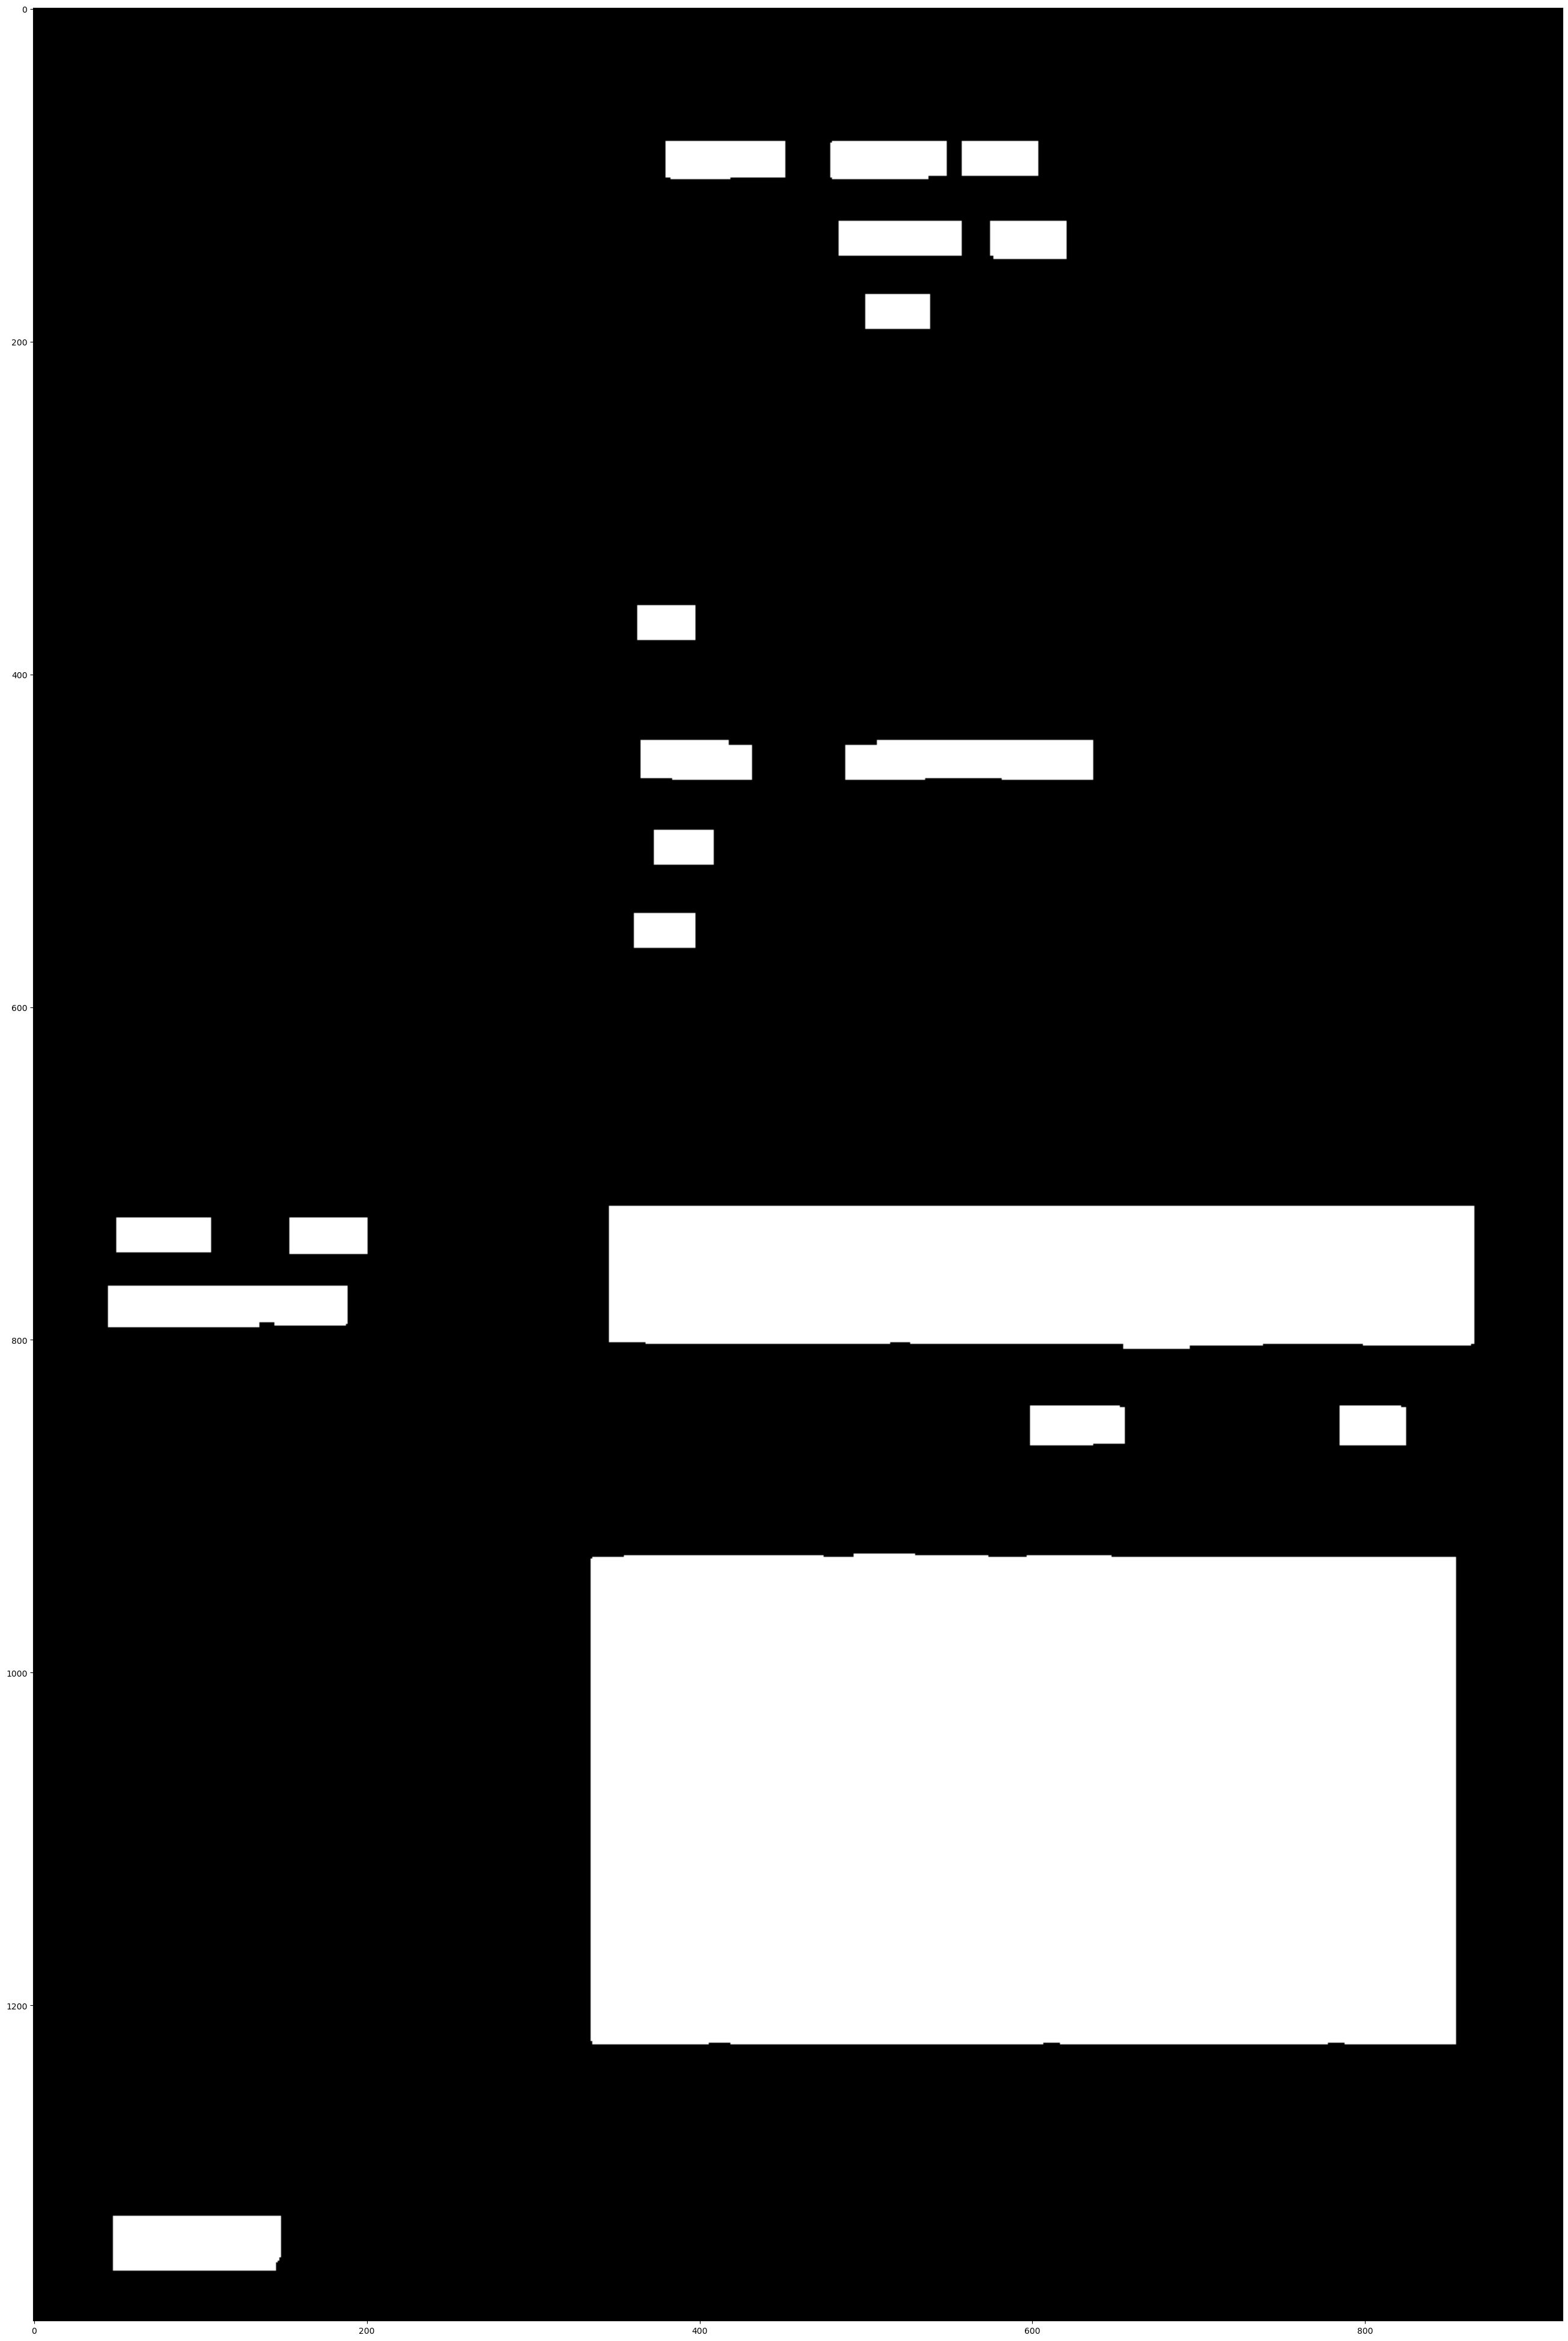

In [44]:
plt.imshow(im_5, cmap='gray')